# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2
import ipywidgets as widgets
from IPython.display import display

# **Load Dataset**

In [2]:
df = pd.read_csv("penyakittulang.csv")
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,Arthritis,muscle_weakness,stiff_neck,movement_stiffness,painful_walking,NaN
1,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,painful_walking
2,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,NaN
3,Arthritis,muscle_weakness,stiff_neck,swelling_joints,painful_walking,NaN
4,Arthritis,muscle_weakness,swelling_joints,movement_stiffness,painful_walking,NaN
5,Arthritis,stiff_neck,swelling_joints,movement_stiffness,painful_walking,NaN
6,Cervical spondylosis,back_pain,neck_pain,dizziness,loss_of_balance,NaN
7,Cervical spondylosis,back_pain,weakness_in_limbs,dizziness,loss_of_balance,NaN
8,Cervical spondylosis,back_pain,weakness_in_limbs,neck_pain,dizziness,loss_of_balance
9,Cervical spondylosis,back_pain,weakness_in_limbs,neck_pain,dizziness,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    19 non-null     object
 1   Symptom_1  19 non-null     object
 2   Symptom_2  19 non-null     object
 3   Symptom_3  19 non-null     object
 4   Symptom_4  19 non-null     object
 5   Symptom_5  9 non-null      object
dtypes: object(6)
memory usage: 1.0+ KB


In [4]:
# Mengecek Duplikat
df.duplicated().sum()

np.int64(1)

In [5]:
# Mengecek Missing Value
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,10


In [6]:
# Mengisi nilai null dengan none
df.fillna("none", inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,Arthritis,muscle_weakness,stiff_neck,movement_stiffness,painful_walking,none
1,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,painful_walking
2,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,none
3,Arthritis,muscle_weakness,stiff_neck,swelling_joints,painful_walking,none
4,Arthritis,muscle_weakness,swelling_joints,movement_stiffness,painful_walking,none


In [7]:
# Mengambil semua gejala unik dari setiap kolom (kecuali kolom pertama) pada df
# lalu menghapus nilai "none" dan mengonversinya menjadi list dan menampilkannya
all_symptoms = set()
for col in df.columns[1:]:
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

[' weakness_in_limbs',
 ' muscle_weakness',
 ' back_pain',
 ' swelling_joints',
 ' joint_pain',
 ' dizziness',
 ' loss_of_balance',
 ' painful_walking',
 ' stiff_neck',
 ' movement_stiffness',
 ' hip_joint_pain',
 ' neck_pain',
 ' knee_pain']

In [8]:
# Membersihkan spasi pada awal kalimat gejala pada DataFrame
# lalu mengumpulkan semua gejala unik (kecuali 'none') dari semua kolom kecuali kolom pertama dan menampilkannya
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_symptoms = set()
for col in df.columns[1:]:
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

<ipython-input-8-2cdcae58202a>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


['dizziness',
 'loss_of_balance',
 'muscle_weakness',
 'hip_joint_pain',
 'neck_pain',
 'joint_pain',
 'painful_walking',
 'weakness_in_limbs',
 'swelling_joints',
 'back_pain',
 'knee_pain',
 'stiff_neck',
 'movement_stiffness']

In [9]:
# Mengurutkan gejala sesuai dengan abjad
all_symptoms = sorted(all_symptoms)
all_symptoms

['back_pain',
 'dizziness',
 'hip_joint_pain',
 'joint_pain',
 'knee_pain',
 'loss_of_balance',
 'movement_stiffness',
 'muscle_weakness',
 'neck_pain',
 'painful_walking',
 'stiff_neck',
 'swelling_joints',
 'weakness_in_limbs']

In [10]:
# Menampilkan jumlah gejala
jumlah_symptoms = len(all_symptoms)
print(f"Jumlah gejala unik: {jumlah_symptoms}")

Jumlah gejala unik: 13


In [11]:
# Fungsi untuk menambah data pelatihan dengan membuat sampel gejala acak berdasarkan penyakit
def augment_data(df, num_augmented_samples=100):
    augmented_data = []
    diseases = df["Disease"].unique()  # Mengambil daftar penyakit unik
    for disease in diseases:
        disease_rows = df[df["Disease"] == disease]
        disease_symptoms = set()
        for _, row in disease_rows.iterrows():
            for col in df.columns[1:]:
                if row[col] != "none":
                    disease_symptoms.add(row[col])  # Mengumpulkan gejala unik penyakit
        disease_symptoms = list(disease_symptoms - {"none"})  # Memastikan "none" tidak ada
        for _ in range(num_augmented_samples):
            num_symptoms = random.randint(1, min(len(disease_symptoms), 16))  # Memilih jumlah gejala acak
            selected_symptoms = random.sample(disease_symptoms, num_symptoms)
            new_row = {"Disease": disease}
            for i in range(1, 17):  # Mengisi kolom gejala dengan "none"
                new_row[f"Symptom_{i}"] = "none"
            for i, symptom in enumerate(selected_symptoms, 1):  # Memasukkan gejala yang dipilih
                if i <= 16:
                    new_row[f"Symptom_{i}"] = symptom
            augmented_data.append(new_row)  # Menambahkan data baru ke list
    return pd.DataFrame(augmented_data)

# Membuat data augmentasi dan gabungkan dengan data asli, lalu isi nilai kosong dengan "none"
df_augmented = augment_data(df, num_augmented_samples=100)
df_combined = pd.concat([df, df_augmented], ignore_index=True)
df_combined.fillna("none", inplace=True)

In [12]:
df_combined

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16
0,Arthritis,muscle_weakness,stiff_neck,movement_stiffness,painful_walking,none,none,none,none,none,none,none,none,none,none,none,none
1,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,painful_walking,none,none,none,none,none,none,none,none,none,none,none
2,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,none,none,none,none,none,none,none,none,none,none,none,none
3,Arthritis,muscle_weakness,stiff_neck,swelling_joints,painful_walking,none,none,none,none,none,none,none,none,none,none,none,none
4,Arthritis,muscle_weakness,swelling_joints,movement_stiffness,painful_walking,none,none,none,none,none,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Osteoarthristis,neck_pain,knee_pain,swelling_joints,hip_joint_pain,joint_pain,painful_walking,none,none,none,none,none,none,none,none,none,none
315,Osteoarthristis,painful_walking,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
316,Osteoarthristis,knee_pain,swelling_joints,none,none,none,none,none,none,none,none,none,none,none,none,none,none
317,Osteoarthristis,joint_pain,painful_walking,hip_joint_pain,swelling_joints,neck_pain,none,none,none,none,none,none,none,none,none,none,none


In [13]:
# Fungsi untuk mengubah gejala di setiap baris menjadi vektor biner berdasarkan daftar gejala unik
def symptoms_to_vector(row):
    symptom_vector = [0] * len(all_symptoms)
    for col in df.columns[1:]:
        symptom = row[col]
        if symptom != "none" and symptom in all_symptoms:
            symptom_vector[all_symptoms.index(symptom)] = 1
    return symptom_vector

# Menerapkan fungsi ke seluruh baris data gabungan untuk membuat DataFrame vektor gejala
symptom_vectors = df_combined.apply(symptoms_to_vector, axis=1, result_type="expand")
symptom_vectors.columns = all_symptoms

In [14]:
# Encode label
le = LabelEncoder()
df_combined["Disease"] = le.fit_transform(df_combined["Disease"])
df_encoded = pd.concat([df_combined["Disease"], symptom_vectors], axis=1)

In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Disease             319 non-null    int64
 1   back_pain           319 non-null    int64
 2   dizziness           319 non-null    int64
 3   hip_joint_pain      319 non-null    int64
 4   joint_pain          319 non-null    int64
 5   knee_pain           319 non-null    int64
 6   loss_of_balance     319 non-null    int64
 7   movement_stiffness  319 non-null    int64
 8   muscle_weakness     319 non-null    int64
 9   neck_pain           319 non-null    int64
 10  painful_walking     319 non-null    int64
 11  stiff_neck          319 non-null    int64
 12  swelling_joints     319 non-null    int64
 13  weakness_in_limbs   319 non-null    int64
dtypes: int64(14)
memory usage: 35.0 KB


In [16]:
df_encoded

,Disease,back_pain,dizziness,hip_joint_pain,joint_pain,knee_pain,loss_of_balance,movement_stiffness,muscle_weakness,neck_pain,painful_walking,stiff_neck,swelling_joints,weakness_in_limbs
0,0,0,0,0,0,0,0,1,1,0,1,1,0,0
1,0,0,0,0,0,0,0,1,1,0,1,1,1,0
2,0,0,0,0,0,0,0,1,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,1,1,1,0
4,0,0,0,0,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2,0,0,1,1,1,0,0,0,1,0,0,1,0
315,2,0,0,0,0,0,0,0,0,0,1,0,0,0
316,2,0,0,0,0,1,0,0,0,0,0,0,1,0
317,2,0,0,1,1,0,0,0,0,1,1,0,1,0


In [17]:
df_encoded['Disease'].value_counts()

,count
Disease,
2,107
0,106
1,106


In [18]:
# Split data
X = df_encoded.drop("Disease", axis=1)
y = df_encoded["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Mendefinisikan model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0004),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027 (4.01 KB)

 Trainable params: 1,027 (4.01 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Menghentikan jika akurasi dan val_akurasi > 95%
class EarlyStopAt95(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
                print("\nAccuracy dan Val Accuracy > 95%, menghentikan pelatihan.")
                self.model.stop_training = True

early_stop_at_95 = EarlyStopAt95()

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=0.00001)
early_stopping_patience = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop_at_95, early_stopping_patience, reduce_lr])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 381ms/step - accuracy: 0.2855 - loss: 1.1247 - val_accuracy: 0.3922 - val_loss: 1.0868 - learning_rate: 4.0000e-04
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3147 - loss: 1.1097 - val_accuracy: 0.4314 - val_loss: 1.0696 - learning_rate: 4.0000e-04
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3730 - loss: 1.0909 - val_accuracy: 0.4314 - val_loss: 1.0535 - learning_rate: 4.0000e-04
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3734 - loss: 1.0706 - val_accuracy: 0.4902 - val_loss: 1.0379 - learning_rate: 4.0000e-04
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3634 - loss: 1.0613 - val_accuracy: 0.5294 - val_loss: 1.0233 - learning_rate: 4.0000e-04
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4740 - loss: 1.0109 - val_accuracy: 0.5882 - val_loss: 1.0091 - learning_rate: 4.0000e-04
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4163 - loss: 1.030

In [21]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9583 - loss: 0.2922
Test Loss: 0.30231478810310364
Test Accuracy: 0.953125


In [22]:
# Prediksi pada data uji dan laporan klasifikasi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 

Classification Report:
                      precision    recall  f1-score   support

           Arthritis       0.95      1.00      0.98        21
Cervical spondylosis       0.91      1.00      0.95        21
     Osteoarthristis       1.00      0.86      0.93        22

            accuracy                           0.95        64
           macro avg       0.96      0.95      0.95        64
        weighted avg       0.96      0.95      0.95        64



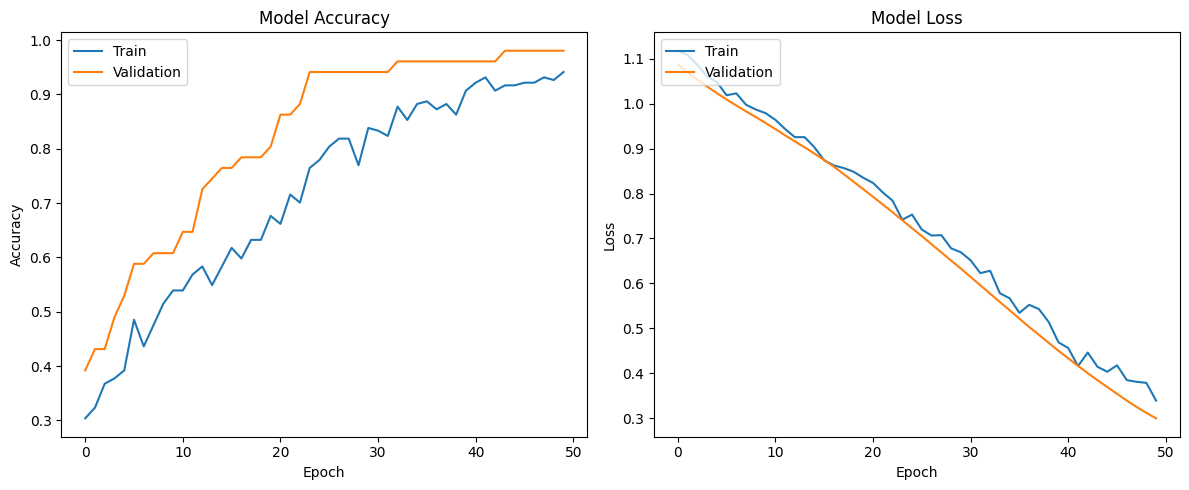

In [23]:
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
# Membuat widget SelectMultiple untuk memilih gejala
symptom_selector = widgets.SelectMultiple(
    options=sorted(all_symptoms), # Mengurutkan gejala untuk tampilan yang lebih baik
    description='Pilih Gejala:',
    disabled=False
)

# Membuat tombol untuk melakukan inferensi
infer_button = widgets.Button(
    description='Diagnosa Penyakit',
    disabled=False,
    button_style='',
    tooltip='Klik untuk mendiagnosa penyakit berdasarkan gejala yang dipilih',
    icon='check'
)

# Fungsi yang akan dijalankan saat tombol ditekan
def on_infer_button_clicked(b):
    selected_symptoms = symptom_selector.value
    if not selected_symptoms:
        print("Silakan pilih setidaknya satu gejala.")
        return

    # Mengubah gejala yang dipilih menjadi vektor input
    user_symptom_vector = [0] * len(all_symptoms)
    for symptom in selected_symptoms:
        if symptom in all_symptoms:
            user_symptom_vector[all_symptoms.index(symptom)] = 1

    # Melakukan prediksi menggunakan model
    prediction = model.predict(np.array([user_symptom_vector]))

    # Mendapatkan kelas prediksi (penyakit)
    predicted_class_index = np.argmax(prediction)
    predicted_disease = le.inverse_transform([predicted_class_index])[0]

    # Menampilkan hasil prediksi
    print(f"\nGejala yang dipilih: {', '.join(selected_symptoms)}")
    print(f"Berdasarkan gejala tersebut, kemungkinan penyakitnya adalah: {predicted_disease}")

# Menghubungkan tombol dengan fungsi
infer_button.on_click(on_infer_button_clicked)

# Menampilkan widget
display(symptom_selector, infer_button)

SelectMultiple(description='Pilih Gejala:', options=('back_pain', 'dizziness', 'hip_joint_pain', 'joint_pain',…

Button(description='Diagnosa Penyakit', icon='check', style=ButtonStyle(), tooltip='Klik untuk mendiagnosa pen…

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Gejala yang dipilih: joint_pain, neck_pain
Berdasarkan gejala tersebut, kemungkinan penyakitnya adalah: Osteoarthristis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Gejala yang dipilih: back_pain, weakness_in_limbs
Berdasarkan gejala tersebut, kemungkinan penyakitnya adalah: Cervical spondylosis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Gejala yang dipilih: movement_stiffness, muscle_weakness, stiff_neck
Berdasarkan gejala tersebut, kemungkinan penyakitnya adalah: Arthritis


In [25]:
import joblib
# Save symptoms to JSON file
with open('bone_symptoms.json', 'w') as f:
    json.dump(all_symptoms, f, indent=4)
print("Symptoms saved to bone_symptoms.json")

# Save model
model.save("bone_disease_model.h5")
print("Model saved to bone_disease_model.h5")

# Save LabelEncoder
joblib.dump(le, "bone_label_encoder.pkl")
print("LabelEncoder saved to bone_label_encoder.pkl")

Symptoms saved to bone_symptoms.json
Model saved to bone_disease_model.h5
LabelEncoder saved to bone_label_encoder.pkl
